In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [85]:
df = pd.read_csv("used car price.csv")

In [86]:
df['Car_Age'] = 2025 - df['Year']
df.drop(columns=['Year'], inplace=True)

In [87]:
df['Kilometers_Driven'] = np.log1p(df['Kilometers_Driven'])


In [88]:
selected_features = ['Car_Age', 'Kilometers_Driven', 'Seats']
target = 'Price'

In [89]:
df.dropna(inplace=True)

In [90]:
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [93]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [94]:
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)


In [95]:
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [96]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [97]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear Coefficients': linear_model.coef_,
    'Ridge Coefficients': ridge_model.coef_
})
print(coefficients_df)
print(f"Linear Regression -> R²: {r2_linear}, MSE: {mse_linear}")
print(f"Ridge Regression -> R²: {r2_ridge}, MSE: {mse_ridge}")

             Feature  Linear Coefficients  Ridge Coefficients
0            Car_Age            -3.318088           -3.312023
1  Kilometers_Driven            -0.612167           -0.614175
2              Seats             0.235181            0.235661
Linear Regression -> R²: -0.016679644020688666, MSE: 129.02658066148254
Ridge Regression -> R²: -0.016611724428508667, MSE: 129.01796100160203


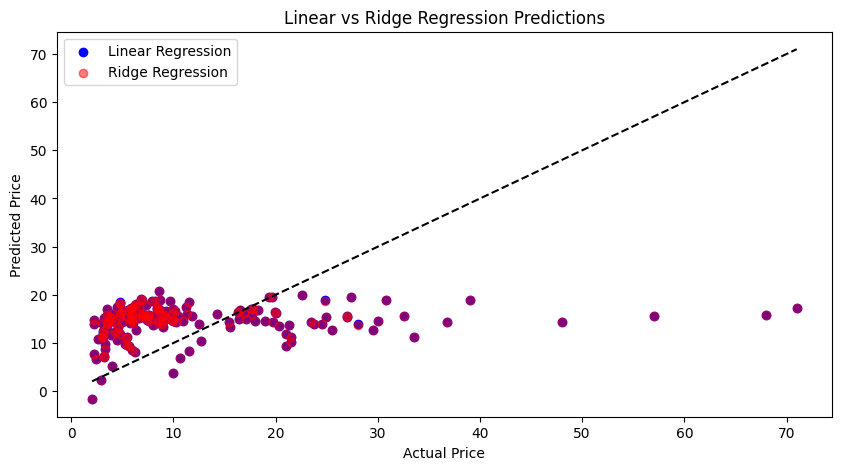

In [98]:

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, label="Linear Regression", color='blue' )
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="black")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Linear vs Ridge Regression Predictions")
plt.show()


In [99]:
diff = abs(coefficients_df['Linear Coefficients']) - abs(coefficients_df['Ridge Coefficients'])
most_impacted_feature = coefficients_df.loc[diff.abs().idxmax(), 'Feature']
print(f"Most impacted feature by Ridge Regression: {most_impacted_feature}")


Most impacted feature by Ridge Regression: Car_Age
